In [25]:
import bnlearn as bn
import numpy as np

import sys
sys.path.append("..")

from notears.notears.notears import linear
from notears.notears.notears import utils

[bnlearn] >Import <sachs>
[bnlearn] >Loading bif file <C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\bnlearn\data\sachs.bif>
[bnlearn] >Checking CPDs..
[bnlearn] >Warning: CPD [Akt] does not add up to 1 but is: [[1.         1.         1.        ]
 [1.         1.         0.99999998]
 [0.99999992 1.         1.        ]]
[bnlearn] >Warning: CPD [Erk] does not add up to 1 but is: [[1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         0.99999999]]
[bnlearn] >Warning: CPD [Jnk] does not add up to 1 but is: [[1.         1.         1.        ]
 [1.00000001 0.99999993 1.        ]
 [0.99999997 1.         1.        ]]
[bnlearn] >Warning: CPD [Mek] does not add up to 1 but is: [[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         0.9999999 ]]

 [[1.00000002 1.         1.        ]
  [0.99999994 1.         1.        ]
  [1.00000001 1.         0.9999999 ]]

 [[0.99999996 1.         1.    

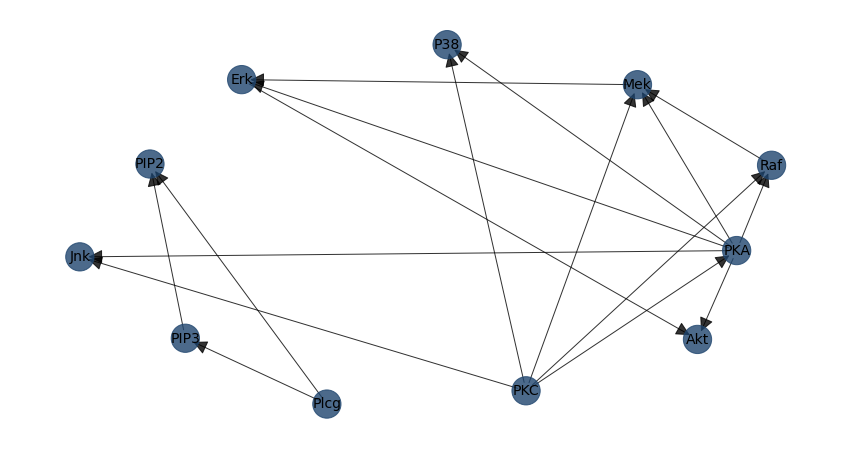

In [7]:
# Load asia DAG
model_true = bn.import_DAG('sachs')
# plot ground truth
G = bn.plot(model_true)

In [28]:
# Sampling
df = bn.sampling(model_true, n=1000)
# Structure learning of sampled dataset
model_learned = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')

[bnlearn] >Forward sampling for 1000 samples..


  0%|          | 0/11 [00:00<?, ?it/s]

[bnlearn] >Warning: Computing DAG with 11 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


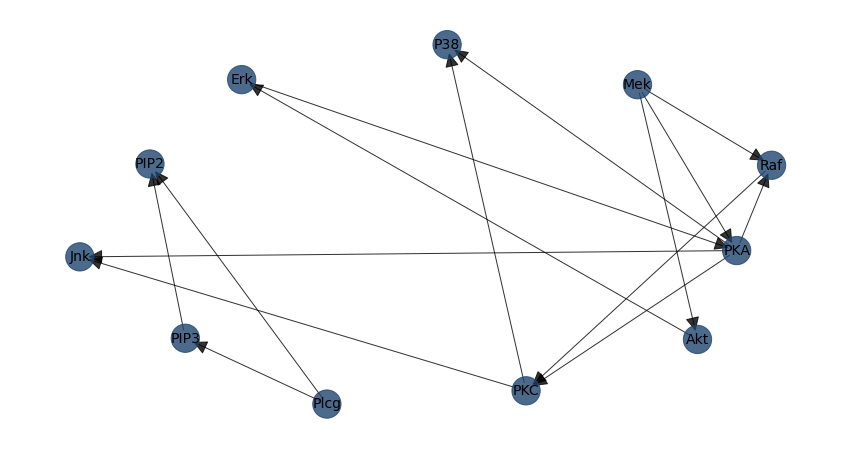

[bnlearn] >Existing coordinates from <pos> are used.


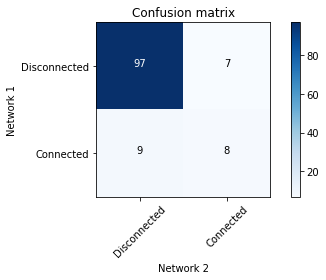

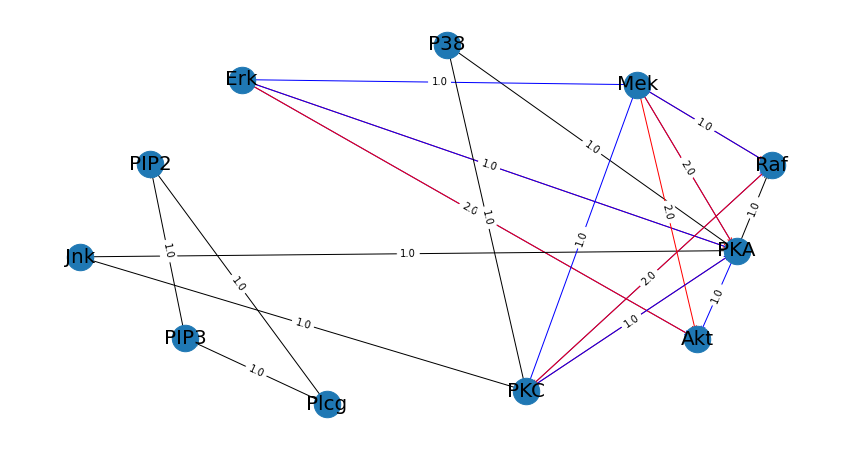

(array([[97,  7],
        [ 9,  8]], dtype=int64),
 target  Erk  Akt  PKA  Mek  Jnk  PKC  Raf  P38  PIP3  PIP2  Plcg
 source                                                          
 Erk       0   -1    2    0    0    0    0    0     0     0     0
 Akt       2    0    0    0    0    0    0    0     0     0     0
 PKA      -1   -1    0   -1    1    2    1    1     0     0     0
 Mek      -1    2    2    0    0    0    2    0     0     0     0
 Jnk       0    0    0    0    0    0    0    0     0     0     0
 PKC       0    0   -1   -1    1    0   -1    1     0     0     0
 Raf       0    0    0   -1    0    2    0    0     0     0     0
 P38       0    0    0    0    0    0    0    0     0     0     0
 PIP3      0    0    0    0    0    0    0    0     0     1     0
 PIP2      0    0    0    0    0    0    0    0     0     0     0
 Plcg      0    0    0    0    0    0    0    0     1     1     0)

In [29]:
# Plot based on structure learning of sampled data
bn.plot(model_learned, pos=G['pos'])
# Compare networks and make plot
bn.compare_networks(model_true, model_learned, pos=G['pos'])

In [30]:
X = df.to_numpy()
print(np.shape(X))

W, h_val = linear.notears_linear(X, lambda1 = 0.0, loss_type = "l2")

(1000, 11)
h: 9.666155875720506e-09.
rho: 1000000000000.0.
loss: (1.7288609390781993, array([ 1.60944567e+00,  1.22750742e+00,  5.51744034e-01,  1.99414764e-04,
       -2.59791108e-03,  5.52167125e-05,  6.34169665e-05,  2.94518453e-05,
       -7.94177407e-05, -7.27116160e-02, -3.30186775e-02,  2.11561544e-04,
        2.57557984e+00, -6.38094068e-04,  3.64641755e-04,  2.53634536e-04,
       -2.50943307e-04,  6.44684058e-04,  7.10275022e-04,  4.82506680e-05,
       -5.35440909e-02, -3.92931462e-02, -7.80119949e-06, -9.50225692e-01,
        1.62375315e+00, -3.25047478e-04, -2.74694279e-04, -4.71651504e-06,
       -1.39869220e-04, -2.37701515e-04,  9.17696859e-05,  2.15089665e-02,
       -2.75516830e-02,  5.90123264e-01,  1.29365080e+00, -7.28396228e-01,
        1.83191228e+00, -2.55356990e-03, -7.94639299e-05,  3.89198503e-04,
        4.40327497e-04,  5.56716923e-04, -1.63741537e-01, -5.06645781e-02,
       -2.28391230e-03,  4.87446293e-01, -8.50725152e-01, -4.91905199e-03,
        2.0314

In [31]:
print(W != 0)
# print
print(sum(model_true['adjmat'].to_numpy()))

utils.count_accuracy(model_true['adjmat'].to_numpy(), W != 0)


[[False False False  True False False False False False False False]
 [ True False  True False False False False False False False False]
 [ True False False  True  True False  True False False False False]
 [False False False False False False  True False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False  True False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False  True False  True]
 [False False False False False False False False  True False False]]
[2 2 1 3 2 0 2 2 1 2 0]


{'fdr': 0.5833333333333334,
 'tpr': 0.29411764705882354,
 'fpr': 0.18421052631578946,
 'shd': 12,
 'nnz': 12}

50 612


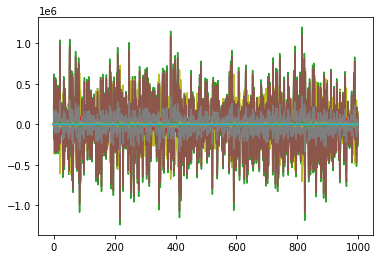

In [38]:
p, num_edges = 50, int(50 * 49 / 4)
print(p, num_edges)

# # generate X, Psi
B_true = utils.simulate_dag(p, num_edges, 'ER')
W_true = utils.simulate_parameter(B_true)
X = utils.simulate_linear_sem(W_true, 1000, 'gauss')
import matplotlib.pyplot as plt
plt.plot(X)
# W, h_val = linear.notears_linear(X, lambda1 = 0.0, loss_type = "l2")

# utils.count_accuracy(B_true, W != 0)